In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# 0 demo

In [2]:
x0 = tf.placeholder(shape=[None,3],dtype=tf.float32,name='x0')
x1 = tf.placeholder(shape=[None,3],dtype=tf.float32,name = 'x1')

In [3]:
w0 = tf.Variable(tf.truncated_normal(shape = [3,5],mean=0.0, \
                                     stddev=tf.sqrt(2.)*tf.sqrt(2.0/(3+5))),dtype=tf.float32,\
                name = 'w0')
w1 = tf.Variable(tf.truncated_normal(shape = [3,5],mean=0.0, \
                                     stddev=tf.sqrt(2.)*tf.sqrt(2.0/(3+5))),dtype=tf.float32,\
                name = 'w1')
b = tf.ones([5],name = 'b')

In [4]:
y0 = tf.matmul(x0,w0) 
y1 = tf.matmul(x0,w0) + tf.matmul(x1,w1) + b
print(y1.shape)

(?, 5)


In [5]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    sample_0 = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
    sample_1 = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])
    y0_val,y1_val = sess.run([y0,y1],feed_dict={x0:sample_0,x1:sample_1})
    print(y0_val)
    print(y1_val)

[[ 1.6134665   2.373169   -0.35242847 -2.0306816   0.58622074]
 [ 3.3212752   6.8747206   0.34205312 -6.0053096   1.2769495 ]
 [ 5.029084   11.376272    1.0365347  -9.979937    1.9676783 ]
 [-0.78820056 -0.4206959   6.0289397   3.0978951   1.34062   ]]
[[ 6.681863  -4.3222394  9.865832   4.921482  22.49868  ]
 [ 4.321275   7.8747206  1.3420532 -5.0053096  2.2769494]
 [ 8.553268   7.618193   7.8842697 -5.8968086 16.349764 ]
 [ 1.1917717 -1.2414455  9.506149   4.311987   8.192333 ]]


## 0.1 rnn by api

In [6]:
x = tf.placeholder(shape=[None,None,3],dtype=tf.float32,name = 'x')

In [7]:
seq_length = tf.placeholder(shape=[None],dtype=tf.int16,name='seq_len')

In [8]:
rnncell = tf.contrib.rnn.BasicRNNCell(5,'relu',name = 'rnncell')

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [9]:
tf.nn.dynamic_rnn?

In [10]:
output,last_state = tf.nn.dynamic_rnn(rnncell,x,seq_length,dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [11]:
x_batch = np.array([
# step 0 step 1
[[0, 1, 2], [9, 8, 7]], # instance 0
[[3, 4, 5], [0, 0, 0]], # instance 1 (padded with a zero vector) 
[[6, 7, 8], [6, 5, 4]], # instance 2
[[9, 0, 1], [3, 2, 1]], # instance 3
        ])
seq_length_batch = np.array([2, 1, 2, 2])

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    output_val,last_state_val = sess.run([output,last_state],feed_dict={x:x_batch,seq_length:seq_length_batch})
    print(output_val.shape)
    print(last_state_val.shape)
    print(output_val)
    print(last_state_val)

(4, 2, 5)
(4, 5)
[[[-0.          1.0023497   0.7880838  -0.          0.27369875]
  [ 0.43939257  3.7147627   1.416872   -0.         -0.        ]]

 [[-0.          2.5017817   1.51826    -0.         -0.        ]
  [ 0.          0.          0.          0.          0.        ]]

 [[-0.          4.0012136   2.2484367  -0.         -0.        ]
  [ 1.2190205   3.0389757   1.3246353  -0.         -0.        ]]

 [[-0.          1.4221356   0.29161632 -0.          0.2781201 ]
  [ 0.7123401   1.061177    0.34605443 -0.         -0.        ]]]
[[ 0.43939257  3.7147627   1.416872   -0.         -0.        ]
 [-0.          2.5017817   1.51826    -0.         -0.        ]
 [ 1.2190205   3.0389757   1.3246353  -0.         -0.        ]
 [ 0.7123401   1.061177    0.34605443 -0.         -0.        ]]


# 1 data

In [13]:
mnist = tf.keras.datasets.mnist
(x_train_src,y_train_src),(x_test_src,y_test_src) = mnist.load_data('./mnist.npz')

In [14]:
print(x_train_src.shape,y_train_src.shape)
print(x_test_src.shape,y_test_src.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [15]:
_,m,n = x_train_src.shape

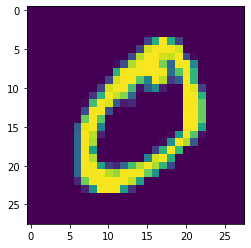

In [16]:
plt.imshow(x_train_src[1,:,:])
plt.show()

# 2 feature

In [17]:
x_train = x_train_src/255.
x_test = x_test_src/255.

In [18]:
y_train = y_train_src
y_test = y_test_src

# 3 model

In [19]:
x = tf.placeholder(shape=[None,m,n],dtype=tf.float32,name='x')
y = tf.placeholder(shape=[None],dtype=tf.int32,name='y')

In [20]:
seq_len = tf.placeholder(shape=[None],dtype=tf.int32,name='seq_len')

In [21]:
#rnncell = tf.contrib.rnn.BasicLSTMCell?

In [22]:
rnncell = tf.contrib.rnn.BasicRNNCell(100,name='rnncell')

In [23]:
tf.nn.dynamic_rnn?

In [24]:
output,last_state = tf.nn.dynamic_rnn(rnncell,x,seq_len,scope='rnn1',dtype=tf.float32)

In [25]:
print(last_state.shape)

(?, 100)


In [29]:
w = tf.Variable(tf.truncated_normal(shape=[100,10],mean=0.,stddev=tf.sqrt(2.)*tf.sqrt(2./(10+100))),\
               dtype=tf.float32,name='w')

In [30]:
b = tf.Variable(tf.ones(shape=[10]),dtype=tf.float32,name='b')

In [31]:
logit = tf.matmul(last_state,w) + b

In [32]:
print(logit.shape)

(?, 10)


In [33]:
#correct = tf.nn.in_top_k?

In [34]:
correct = tf.nn.in_top_k(logit,y,1,name ='correst')

In [35]:
acc = tf.reduce_mean(tf.cast(correct,tf.float32),name='acc')

# 4 loss

In [36]:
all_loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logit,labels=y,name='all_loss')

In [37]:
loss = tf.reduce_mean(all_loss)

# 5 optimize

In [38]:
optimize = tf.train.AdamOptimizer(learning_rate=3e-4,name='optimize')

In [39]:
train_op = optimize.minimize(loss)

# 6 init

In [40]:
init_op = tf.global_variables_initializer()

# 7 train

In [41]:
num_epochs = 100
batch_size = 128
num_batch = int(x_train.shape[0]/128) + 1

In [42]:
saver = tf.train.Saver()

In [43]:
def feed_batch(n_epochs,batch_index,batch_size,x_train,y_train):
    beg = (batch_index -1 )* batch_size
    end = batch_index * batch_size;
    
    return x_train[beg:end],y_train[beg:end],np.array([i.shape[0] for i in x_train[beg:end]])

In [44]:
with tf.Session() as sess:
    sess.run(init_op)
    for i in range(num_epochs):
        for j in range(1,num_batch):
            sample_x,sample_y,sample_len = feed_batch(i,j,batch_size,x_train,y_train)
            #print(sample_x.shape,sample_y.shape,sample_len.shape)
            if j%100 == 0:
                acc_train,loss_train,_ = sess.run([acc,loss,train_op],\
                                                  feed_dict={x:sample_x,y:sample_y,seq_len:sample_len})
                acc_test = sess.run(acc,feed_dict={x:x_test,y:y_test,\
                                                   seq_len:np.array([i.shape[0] for i in x_test])})
                #print('%d\t%d\t%f\t%f\t%f'%(i,j,loss_train,acc_train,acc_test))
            else:
                _ = sess.run([train_op],feed_dict={x:sample_x,y:sample_y,seq_len:sample_len})
        acc_test,loss_test = sess.run([acc,loss],feed_dict={x:x_test,y:y_test,\
                                                        seq_len:np.array([i.shape[0] for i in x_test])})
        acc_train,loss_train = sess.run([acc,loss],feed_dict={x:x_train,y:y_train,\
                                                          seq_len:np.array([i.shape[0] for i in x_train])})
        print('%d\t%f\t%f\t%f\t%f'%(i,acc_train,loss_train,acc_test,loss_test))
        
    acc_test,loss_test = sess.run([acc,loss],feed_dict={x:x_test,y:y_test,\
                                                        seq_len:np.array([i.shape[0] for i in x_test])})
    acc_train,loss_train = sess.run([acc,loss],feed_dict={x:x_train,y:y_train,\
                                                          seq_len:np.array([i.shape[0] for i in x_train])})
    print('%f\t%f\t%f\t%f'%(acc_train,loss_train,acc_test,loss_test))
    saver.save(sess,'./model/rnn')

0	0.845683	0.522299	0.849900	0.517490
1	0.908667	0.315426	0.908700	0.314486
2	0.929950	0.247240	0.927600	0.248217
3	0.938517	0.212102	0.935500	0.213671
4	0.945250	0.189508	0.941000	0.190721
5	0.948850	0.177594	0.944300	0.177827
6	0.951583	0.166880	0.947300	0.167872
7	0.953967	0.157387	0.951100	0.159825
8	0.956183	0.149766	0.953500	0.153902
9	0.958300	0.142385	0.955900	0.148810
10	0.961083	0.134871	0.957100	0.144348
11	0.963317	0.126816	0.959200	0.139670
12	0.965633	0.118226	0.960800	0.133374
13	0.967117	0.113822	0.962400	0.130525
14	0.968133	0.109461	0.962600	0.128428
15	0.969467	0.104517	0.962500	0.125876
16	0.971783	0.098371	0.963900	0.121747
17	0.973267	0.093106	0.966100	0.117485
18	0.973950	0.089803	0.966900	0.115283
19	0.974350	0.088156	0.967400	0.114863
20	0.974550	0.087333	0.967400	0.115090
21	0.974333	0.086691	0.967300	0.115543
22	0.974217	0.086617	0.966800	0.115768
23	0.974967	0.084215	0.967100	0.113460
24	0.975000	0.084179	0.968300	0.112642
25	0.975617	0.081483	0.968100	0.112

In [45]:
with tf.Session() as sess:
    saver.restore(sess,'./model/rnn')
    acc_test,loss_test = sess.run([acc,loss],feed_dict={x:x_test,y:y_test,\
                                                        seq_len:np.array([i.shape[0] for i in x_test])})
    acc_train,loss_train = sess.run([acc,loss],feed_dict={x:x_train,y:y_train,\
                                                          seq_len:np.array([i.shape[0] for i in x_train])})
    print('%f\t%f\t%f\t%f'%(acc_train,loss_train,acc_test,loss_test))

INFO:tensorflow:Restoring parameters from ./model/rnn
0.991483	0.025939	0.976800	0.100328
